Unpickling Data files begin
[b'batch_label', b'labels', b'data', b'filenames']
<class 'list'>
uint8
(32, 32, 3)
[[ 59  43  50 ... 216 151 123]
 [ 62  46  48 ... 184 118  92]
 [ 63  45  43 ... 140  84  72]]
(50000, 3072)
(50000,)
***
[6 9 9 4 1]
(50000, 3072)
float64


ValueError: continuous target data is not supported with label binarization

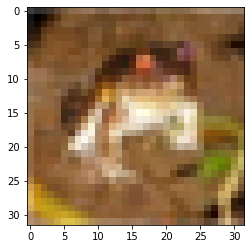

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import copy
from sklearn.preprocessing import label_binarize
import warnings
np.set_printoptions(precision=3, suppress=True)  # Print array values as 0.0023 instead of 2.352e-3
torch.set_printoptions(precision=3, sci_mode=False)


class CNN_CIFAR:
    
    def __init__(self):
        pass
    
    def unpickle(self,file):
        import pickle
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict
    def scale_data(self,data):
        data = data/255
        data = (2*data)-1
        return data
    
    def build_model(self):
        torch.manual_seed(0)
        
        filter_size = 5
        num_filters = 10
        pool_size = 2
        
        model = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3,
                    out_channels=num_filters,
                    kernel_size=filter_size,
                    stride = 1,
                    padding=2
                           ),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=pool_size),
            torch.nn.Conv2d(in_channels=num_filters,
                    out_channels=2*num_filters,
                    kernel_size=filter_size,
                    stride = 1,
                    padding=2
                           ),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=pool_size, stride=pool_size),
            torch.nn.Flatten(),
            torch.nn.Linear((2*num_filters * 16**2)//pool_size**2, 10),           
        )
        model = model.float()
        return model
    
    def train_model(self,model,X_train,y_train,batch_size,epoch_num):
        #define loss function as entropy loss funcion
        model.float()
        loss = torch.nn.CrossEntropyLoss()
        loss = loss.float()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=1e-3)
        for epoch in range(1, epoch_num+1):
            for i in range(0, len(X_train), batch_size):        
                X = X_train[i:i+batch_size]
                y = y_train[i:i+batch_size]

                y_pred = model(X)
                print(y_pred.shape)
                print(y.shape)
                l = loss(y_pred, y.long())
        
                model.zero_grad()
                l.backward()
                optimizer.step()
        
            print("Epoch %d final minibatch had loss %.4f" % (epoch, l.item()))
        return model
        
    
    def start(self):
        print("Unpickling Data files begin")
        #unpickling the data set
        file1 = 'data_batch_1'
        file2 = 'data_batch_2'
        file3 = 'data_batch_3'
        file4 = 'data_batch_4'
        file5 = 'data_batch_5'
        test_file = 'test_batch'
        
        X_d1 = self.unpickle(file1)
        X_d2 = self.unpickle(file2)
        X_d3 = self.unpickle(file3)
        X_d4 = self.unpickle(file4)
        X_d5 = self.unpickle(file5)
        
        X_dtest = self.unpickle(test_file)
        
        print(list(X_d1.keys()))        
        
        X1,y1 = X_d1[b'data'],(X_d1[b'labels'])
        X2,y2 = X_d2[b'data'],(X_d2[b'labels'])
        X3,y3 = X_d3[b'data'],(X_d3[b'labels'])
        X4,y4 = X_d4[b'data'],(X_d4[b'labels'])
        X5,y5 = X_d5[b'data'],(X_d5[b'labels'])
        
        X_test,y_test = X_dtest[b'data'],(X_dtest[b'labels'])
        
        
       # print(X1[0].reshape(3,32,32).transpose(1,2,0).shape)
        #plt.imshow(X1[0].reshape(3,32,32).transpose(1,2,0))

        
        X = np.vstack((X1,X2,X3,X4,X5))
       
        y = y1+y2+y3+y4+y5
        
        y = np.asarray(y)
        
        model = self.build_model()

        
        #Rescaling pixel data to fit between -1 and 1
        X = self.scale_data(X)
       
        
        X = X.reshape(-1,3,32,32)
        print(X.dtype)
        
        y = label_binarize(y,classes = np.arange(0,10,1))
        X,y = torch.tensor(X), torch.tensor(y)
        
        X = X.float()
        y = y.float()
        #predictions before training
        y_pred = model(X[:5].float())
        print(y_pred)
        print(torch.softmax(model(X[:5].float()), dim=1))
            
        model = self.train_model(model,X,y,100,5)
        
        #predictions after training
        y_pred = model(X[:5].float())
        print(y_pred)
        print(torch.softmax(model(X[:5].float()), dim=1))
        
        
        X_test = self.scale_data(X)
        y_test =  np.asarray(y_test)
        
        y_test = label_binarize(y_test,classes = np.arange(0,10,1))
        
        X_test,y_test = torch.tensor(X_test), torch.tensor(y_test)
        
        X_test = X_test.float()
        y_test = y_test.float()
        
        #To be Tested
        
        return
    
    
    
    
obj = CNN_CIFAR()
obj.start()
        
        
        